In [95]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import glob
import pickle
import numpy as np
import sys, os
import pylab
import time 
import scipy.misc
from skimage.transform import resize
import matplotlib
import cv2
import re
from PIL import Image

import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Lambda,Input, concatenate, Conv2DTranspose
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization 
from keras.utils import np_utils 
from keras import optimizers 
from keras.models import load_model
from keras.models import model_from_json

import keras.backend as K 
print('Image ordering is tf check: ', K.common.image_dim_ordering())

Image ordering is tf check:  tf


In [107]:
def remove_transparency(im, bg_colour=(255, 255, 255)):

    # Only process if image has transparency 
    if im.mode in ('RGBA', 'LA') or (im.mode == 'P' and 'transparency' in im.info):

        # Need to convert to RGBA if LA format due to a bug in PIL 
        alpha = im.convert('RGBA').split()[-1]

        # Create a new background image of our matt color.
        # Must be RGBA because paste requires both images have the same format

        bg = Image.new("RGBA", im.size, bg_colour + (255,))
        bg.paste(im, mask=alpha)
        return bg

    else:
        return im

def load_image(image_path, resize=(512, 512)):
    image = Image.open(image_path)
    image = remove_transparency(image).convert('L')
    image = image.resize(resize)
    image = np.array(image)
    image = image.reshape((512, 512, 1))
    image = np.expand_dims(image, axis=0)
    return image

In [108]:
# Load Model
json_string = pickle.load( open( "model_json.pkl", "rb" ) )
model = model_from_json(json_string)
model.load_weights('model_weights')

In [126]:
# Load Image
test_image_1 = load_image("000006.png")
print(image.shape)

(1, 512, 512, 1)


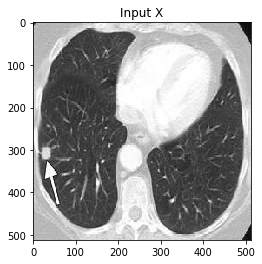

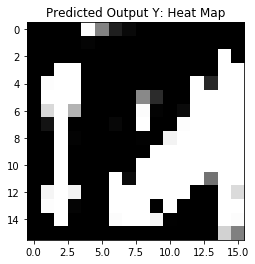


PREDICTED TOP 1:  (array([ 3,  3,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 14, 14],
      dtype=int64), array([ 2, 14,  2,  3, 14, 15,  2,  3, 12, 14, 15,  2, 12, 14, 15,  2, 12,
       14, 15,  2, 11, 12, 14, 15,  2, 10, 11, 12, 13, 14,  9, 10, 11, 12,
       14,  2,  8,  9, 10, 11, 14,  2,  6,  8, 10, 14,  6,  8, 14,  8, 14],
      dtype=int64))


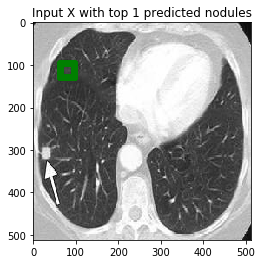

In [127]:
#predicting for the image with the trained model
yout = model.predict(test_image_1)

#Plotting input image
plt.imshow(test_image_1.reshape(512,512),cmap = 'gray')
plt.title('Input X')
plt.show()


#Plotting predicted output
plt.imshow(yout[0,:,:,0].reshape(16,16),cmap = 'gray')
plt.title('Predicted Output Y: Heat Map')
plt.show()

#Plotting the highest few maximum values in the predicted output

top5 = []
for last in range(1,2):
    print('\nPREDICTED TOP '+str(last) +': ',np.where(yout[0,:,:,0]==sorted(yout[0,:,:,0].ravel())[-last]))
    top5.append(np.where(yout[0,:,:,0]==sorted(yout[0,:,:,0].ravel())[-last]))
    
#Plotting input image with top 5 predicted boundaries
plt.imshow(test_image_1.reshape(512,512),cmap = 'gray')
for y,x in top5:

    lines_x = []
    lines_y = []
    startx = x[0]*32
    endx = startx + 32
    starty = y[0]*32
    endy = starty + 32
#     test_image_1.reshape(512,512)= cv2.circle(test_image_1.reshape(512,512),(startx,starty),(endx,endy),(0,255,0),1)
    toph_x = [xx for xx in range(startx,endx+1)]
    toph_y = [starty for new in toph_x]
    lines_x.append(toph_x)
    lines_y.append(toph_y)
    
    bottomh_x = [xx for xx in range(startx,endx+1)]
    bottomh_y = [endy for new in bottomh_x]
    lines_x.append(bottomh_x)
    lines_y.append(bottomh_y)
    
    leftv_y = [yy for yy in range(starty,endy+1)]
    leftv_x=[startx for new in leftv_y]
    lines_x.append(leftv_x)
    lines_y.append(leftv_y)
    
    rightv_y = [yy for yy in range(starty,endy+1)]
    rightv_x = [endx for new in rightv_y]
    lines_x.append(rightv_x)
    lines_y.append(rightv_y)
    
    #Plotting bounding box
    plt.plot(lines_x,lines_y,'go')
    
    
plt.title('Input X with top 1 predicted nodules')
plt.show()